# Jeremy Liu EDA

# Research question: To what extend would Airbnb's room_type including bathroom, bedrooms affect the price? 


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('../data/raw/listings.csv')
dataset

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17891,https://www.airbnb.com/rooms/17891,20221223064914,2022-12-23,previous scrape,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,https://a0.muscache.com/pictures/119686/6ced58...,69063,...,4.93,4.90,4.66,NaN,f,1,1,0,0,0.47
1,72571,https://www.airbnb.com/rooms/72571,20221223064914,2022-12-23,city scrape,SoHo off Hollywood Road 3A,"Located steps from Hollywood road, with new ea...",NaN,https://a0.muscache.com/pictures/2849554/d2262...,304876,...,4.51,4.73,4.13,NaN,f,10,6,4,0,1.05
2,923017,https://www.airbnb.com/rooms/923017,20221223064914,2022-12-23,city scrape,Comfort Home in Prince Edward Mtr 4 beds,A newly renovated apartment located in the ci...,Disneyland Discount ticket<br />Ocean Park Di...,https://a0.muscache.com/pictures/f3913158-fa84...,4971086,...,4.85,4.86,4.75,NaN,t,2,2,0,0,3.03
3,944283,https://www.airbnb.com/rooms/944283,20221223064914,2022-12-23,city scrape,2 Bed Rooms heart of Central SOHO( sleeps 3),"Soho, best Location in Central. Hong Kong.<br ...",Amazing location on Wellington street in Centr...,https://a0.muscache.com/pictures/9ade4292-c83a...,5100812,...,4.72,4.85,4.57,NaN,f,2,1,1,0,0.61
4,956857,https://www.airbnb.com/rooms/956857,20221223064914,2022-12-23,city scrape,large Room- Heart of Soho/Central,Awesome Location in Central.<br />Clean large...,NaN,https://a0.muscache.com/pictures/3ab4ff36-81de...,5100812,...,5.00,5.00,5.00,NaN,f,2,1,1,0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,869969,https://www.airbnb.com/rooms/869969,20221223064914,2022-12-23,city scrape,Studio available in Prince Edward,Studio<br /><br />Building with Lift.<br /><br...,NaN,https://a0.muscache.com/pictures/75172404/ba1b...,4584648,...,4.00,4.00,5.00,NaN,f,383,12,363,8,0.02
5190,870046,https://www.airbnb.com/rooms/870046,20221223064914,2022-12-23,city scrape,10 mins to CITY U --------- by MTR,Fully furnished. No need to worry about any fu...,NaN,https://a0.muscache.com/pictures/69952309/fc7e...,4584648,...,5.00,4.00,4.00,NaN,f,383,12,363,8,0.01
5191,894221,https://www.airbnb.com/rooms/894221,20221223064914,2022-12-23,city scrape,Best room for you near MTR,"Best room 4 u near MTR,<br />-- next to MTR! <...",NaN,https://a0.muscache.com/pictures/62594195/2aa1...,4584648,...,NaN,NaN,NaN,NaN,f,383,12,363,8,NaN
5192,894224,https://www.airbnb.com/rooms/894224,20221223064914,2022-12-23,city scrape,Tsimshatsui Room in Flat Share,My place is close to restaurants and dining an...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4584648,...,NaN,NaN,NaN,NaN,f,383,12,363,8,0.01


In [58]:
df=dataset[["room_type","bathrooms_text","bedrooms","price"]]
df

,room_type,bathrooms_text,bedrooms,price
0,Entire home/apt,1 bath,NaN,"$1,400.00"
1,Entire home/apt,1 bath,NaN,$577.00
2,Entire home/apt,1.5 baths,3.0,"$1,036.00"
3,Entire home/apt,1 bath,2.0,$930.00
4,Private room,1 bath,1.0,$351.00
...,...,...,...,...
5189,Private room,1 bath,1.0,$217.00
5190,Entire home/apt,NaN,1.0,$180.00
5191,Private room,NaN,1.0,$180.00
5192,Private room,NaN,1.0,$140.00


In [59]:
df.shape

(5194, 4)

## From here we know there are 5194 different suits and i do have dropped the bedrooms that doesn't have any data provided.

In [60]:
newdf=pd.read_csv('../data/processed/jeremy_process.csv')
newdf=df.dropna(subset=['bedrooms'])
newdf=newdf.drop(newdf[newdf['bedrooms']==0].index)
newdf =newdf.reset_index(drop=True)
newdf['price'] = newdf['price'].replace({'\$':''}, regex=True)
newdf['price'] = pd.to_numeric(newdf['price'], errors='coerce')
newdf


,room_type,bathrooms_text,bedrooms,price
0,Entire home/apt,1.5 baths,3.0,NaN
1,Entire home/apt,1 bath,2.0,930.0
2,Private room,1 bath,1.0,351.0
3,Entire home/apt,1 bath,1.0,709.0
4,Shared room,8 shared baths,1.0,180.0
...,...,...,...,...
4207,Private room,1 bath,1.0,217.0
4208,Entire home/apt,NaN,1.0,180.0
4209,Private room,NaN,1.0,180.0
4210,Private room,NaN,1.0,140.0


<AxesSubplot:xlabel='room_type', ylabel='price'>

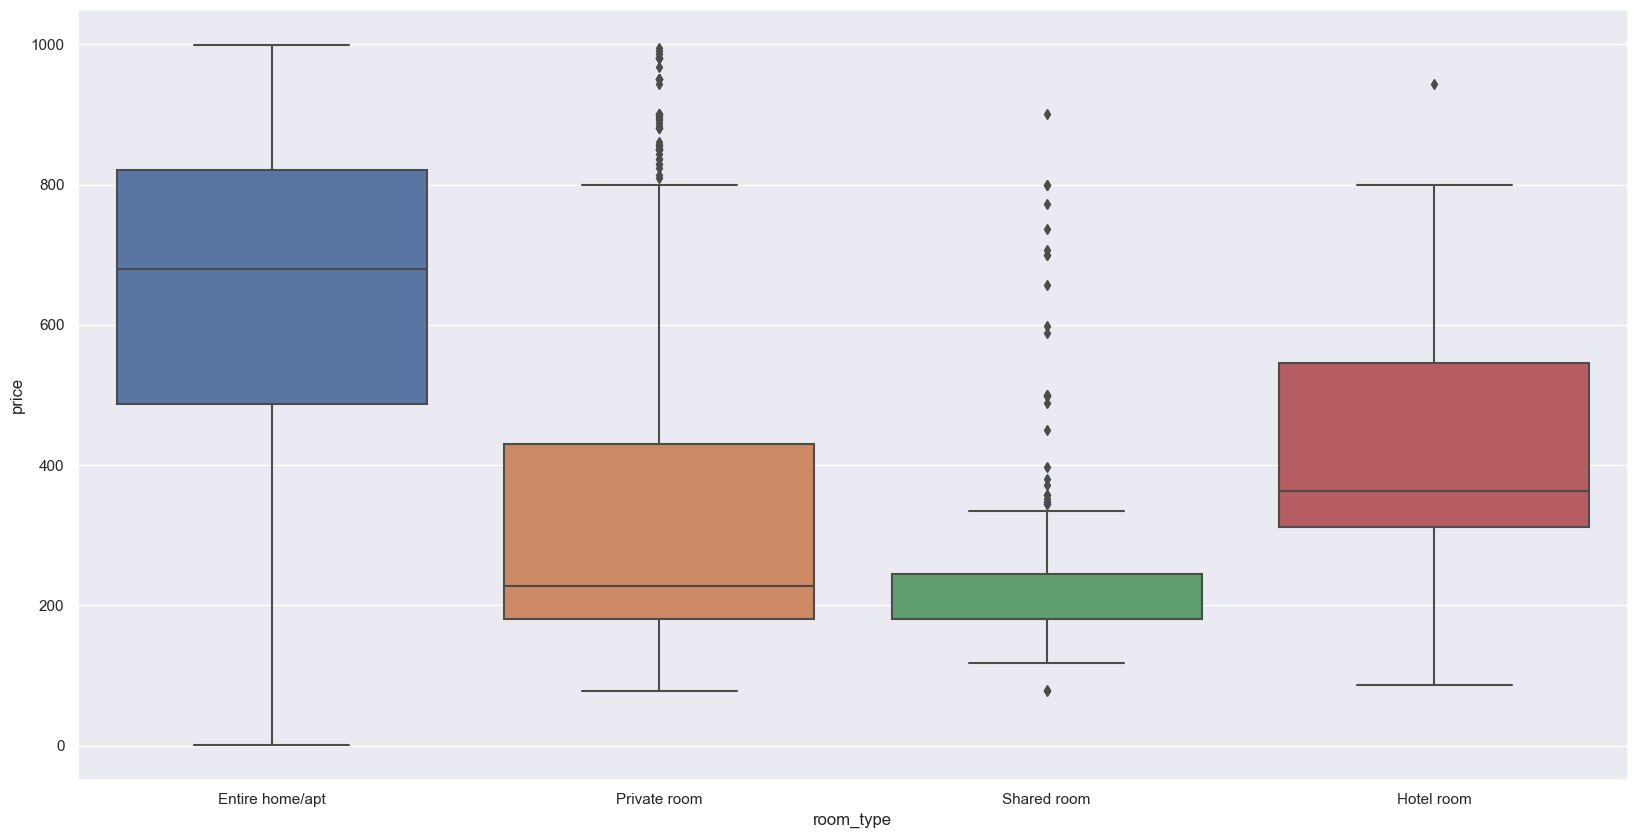

In [61]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.boxplot(x="room_type", y="price",
    data=newdf)

# This graph tells us the relation between price and different room-types

In [62]:
newdf = newdf[newdf['price'].between(100, 2600.00)]
newdf

,room_type,bathrooms_text,bedrooms,price
1,Entire home/apt,1 bath,2.0,930.0
2,Private room,1 bath,1.0,351.0
3,Entire home/apt,1 bath,1.0,709.0
4,Shared room,8 shared baths,1.0,180.0
5,Private room,1 bath,1.0,180.0
...,...,...,...,...
4207,Private room,1 bath,1.0,217.0
4208,Entire home/apt,NaN,1.0,180.0
4209,Private room,NaN,1.0,180.0
4210,Private room,NaN,1.0,140.0


## From this we can see that the price would be cheaper in private room,shared room, hotel room compared to entire home/apt

<Figure size 2000x1000 with 0 Axes>

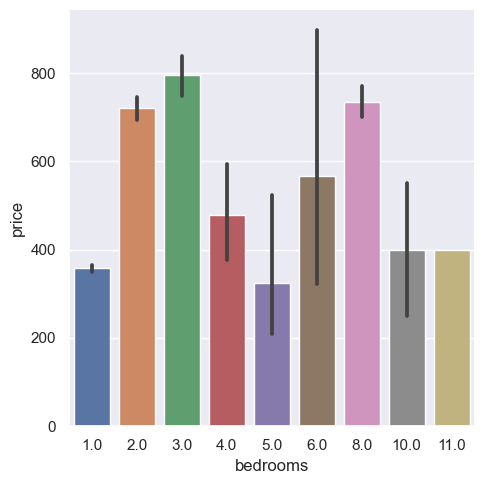

In [63]:
newdf = newdf[newdf['bedrooms'].between(1, 11)]
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.catplot(data=newdf, x="bedrooms", y="price", kind="bar")

# From this graph we can see that the price and bedrooms 

<Figure size 2000x1000 with 0 Axes>

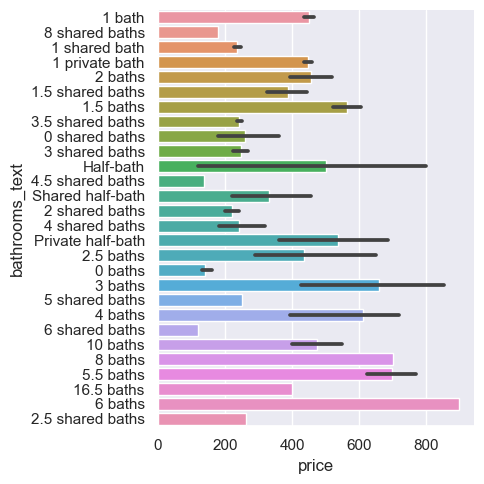

In [64]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.catplot(data=newdf, x="price", y="bathrooms_text", kind="bar")
newdf.to_csv('../data/processed/jeremy_process.csv', index=False)

# From this graph we can see the relation between price and bathrooms_text

# Milestone 4 Task 1-3

In [65]:
newdf

,room_type,bathrooms_text,bedrooms,price
1,Entire home/apt,1 bath,2.0,930.0
2,Private room,1 bath,1.0,351.0
3,Entire home/apt,1 bath,1.0,709.0
4,Shared room,8 shared baths,1.0,180.0
5,Private room,1 bath,1.0,180.0
...,...,...,...,...
4207,Private room,1 bath,1.0,217.0
4208,Entire home/apt,NaN,1.0,180.0
4209,Private room,NaN,1.0,180.0
4210,Private room,NaN,1.0,140.0


In [66]:
import pandas as pd
import numpy as np

In [78]:
dftest = newdf.rename(columns={"room_type": "Rt", "bathrooms_text":"Bt"}) \
.reset_index(drop=True)
dftest['bedrooms'] = dftest['bedrooms'].round().astype(int)
dftest

,Rt,Bt,bedrooms,price
0,Entire home/apt,1 bath,2,930.0
1,Private room,1 bath,1,351.0
2,Entire home/apt,1 bath,1,709.0
3,Shared room,8 shared baths,1,180.0
4,Private room,1 bath,1,180.0
...,...,...,...,...
3225,Private room,1 bath,1,217.0
3226,Entire home/apt,NaN,1,180.0
3227,Private room,NaN,1,180.0
3228,Private room,NaN,1,140.0


In [84]:
dftest['Bt'] = dftest['Bt'].str.replace(r'\D', '', regex=True).dropna()
dftest

,Rt,Bt,bedrooms,price
0,Entire home/apt,1,2,930.0
1,Private room,1,1,351.0
2,Entire home/apt,1,1,709.0
3,Shared room,8,1,180.0
4,Private room,1,1,180.0
...,...,...,...,...
3225,Private room,1,1,217.0
3226,Entire home/apt,NaN,1,180.0
3227,Private room,NaN,1,180.0
3228,Private room,NaN,1,140.0


In [88]:
dfm = (
    pd.read_csv('../data/processed/jeremy_process.csv', usecols= ['room_type', 'bathrooms_text', 'bedrooms','price'])
    .rename(columns={"room_type": "Rt", "bathrooms_text":"Bt"})
    .reset_index(drop=True)
)
dfm['bedrooms'] = dfm['bedrooms'].round().astype(int)
dfm

,Rt,Bt,bedrooms,price
0,Entire home/apt,1 bath,2,930.0
1,Private room,1 bath,1,351.0
2,Entire home/apt,1 bath,1,709.0
3,Shared room,8 shared baths,1,180.0
4,Private room,1 bath,1,180.0
...,...,...,...,...
3225,Private room,1 bath,1,217.0
3226,Entire home/apt,NaN,1,180.0
3227,Private room,NaN,1,180.0
3228,Private room,NaN,1,140.0


In [89]:
dfm['Bt']=dfm['Bt'].str.replace(r'\D', '', regex=True).dropna()
dfm

,Rt,Bt,bedrooms,price
0,Entire home/apt,1,2,930.0
1,Private room,1,1,351.0
2,Entire home/apt,1,1,709.0
3,Shared room,8,1,180.0
4,Private room,1,1,180.0
...,...,...,...,...
3225,Private room,1,1,217.0
3226,Entire home/apt,NaN,1,180.0
3227,Private room,NaN,1,180.0
3228,Private room,NaN,1,140.0


In [90]:
def load_and_process(url_or_path_to_csv_file):
    dfm = (
    pd.read_csv('../data/processed/jeremy_process.csv', usecols= ['room_type', 'bathrooms_text', 'bedrooms','price'])
    .rename(columns={"room_type": "Rt"})
    .rename(columns={"bathrooms_text":"Bt"})
    .loc[lambda x: x['price']>2000]
    .reset_index(drop=True))
    
    df2 = (dfm)
    return df2
dfm
        

,Rt,Bt,bedrooms,price
0,Entire home/apt,1,2,930.0
1,Private room,1,1,351.0
2,Entire home/apt,1,1,709.0
3,Shared room,8,1,180.0
4,Private room,1,1,180.0
...,...,...,...,...
3225,Private room,1,1,217.0
3226,Entire home/apt,NaN,1,180.0
3227,Private room,NaN,1,180.0
3228,Private room,NaN,1,140.0


In [91]:
dfm.to_csv('../data/processed/jeremy_process_dfm.csv')
dfm

,Rt,Bt,bedrooms,price
0,Entire home/apt,1,2,930.0
1,Private room,1,1,351.0
2,Entire home/apt,1,1,709.0
3,Shared room,8,1,180.0
4,Private room,1,1,180.0
...,...,...,...,...
3225,Private room,1,1,217.0
3226,Entire home/apt,NaN,1,180.0
3227,Private room,NaN,1,180.0
3228,Private room,NaN,1,140.0
